In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [210]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Problem statement
As a talent acquistion manager, I am conducting a research on salaries of people working in domain of data science. Several independent variables can affect the salaries, including comapny size, location,job titles and experience level.I conducted a multiple linear analysis to predict a future salaries under a scenario of the coefficient values of these variables changing.

# LOAD AND CLEAN THE DATASET


The dataset is about the salaries in data science job. The dataset contains 3756 rows and 11 columns. 

The details of columns are as follows:


*work_year=The year in which salary is paid(2021,2022,2023)*

*experience_level=The position held in job (SE=senior level,MI=medium level,EX=executive level,EN=Entry level)*

*employment_type= The type of employment(FT=full time,CT=contract,FL=freelance,PT=part time)*

*job_title=The job role of individual*

*salary=Total gross salary paid*

*salary_currency=The currency of salary paid*

*salary_in_usd=The salary converted into USD*

*employee_residence=The country of residence of individuals during that year*

*remote_ratio=The amount of work done remotely*

*company_location=The country of company's location*

*company_size=The size on basis on n=median number of people who worked in company(S=small,M=medium,L=large)*



In [ ]:
The link of the dataset :

In [211]:
#Load the dataset
Data= pd.read_csv('C:/Users/Dell/Downloads/practical-workshops-aditianand0308/portfolio-aditianand0308/ds_salaries.CSV')
Data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [212]:
#Shape of data gives the rows and coloumns in the dataset
Data.shape

(3755, 11)

In [213]:
#Unique features in the dataset
Data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [214]:
#Sum of the number of missing values
Data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

It can be concluded that there are no missing values in the dataset

In [215]:
#Number of unique values for each feature
features = Data.columns
Data[features].nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

It showed us the number of unique values in each variable

In [216]:
#Summary statistics of each column in dataframe
Data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [217]:
# check for duplicates
Data.duplicated().sum()

1171

In [218]:
category_counts=Data["job_title"].value_counts()
category_counts

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

It shows the number of employess in each job title with maximum people working as data engineer followed by data scientist and data analyst

In [219]:
#Replacing the short forms with full forms for better understanding
Data['employment_type'] = Data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
Data['company_size'] = Data['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})

Data['experience_level'] = Data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})


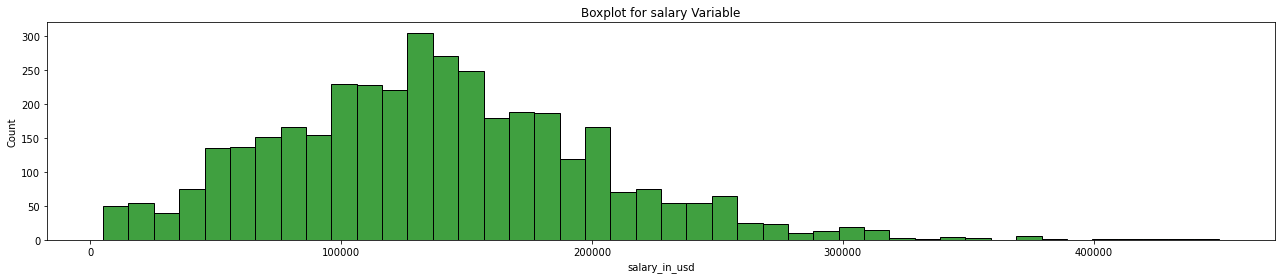

In [220]:
#Boxplot for the salary variable
plt.figure(figsize=[22,4])
sns.histplot(x = 'salary_in_usd', data = Data,color='green')
plt.title('Boxplot for salary Variable')
plt.show()

The histogram is right skewed.The boxplot of salary in USD has multiple outliers but the salaries are different for different job types, location and experience level.Hence removal of these outliers would give a biased result.

<AxesSubplot:ylabel='salary_in_usd'>

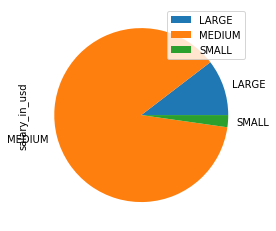

In [221]:
Data.groupby(['company_size']).sum().plot(
    kind='pie', y='salary_in_usd')

The pie chart shows that the medium size companies pays highest salaries to its employees followed by large and small.

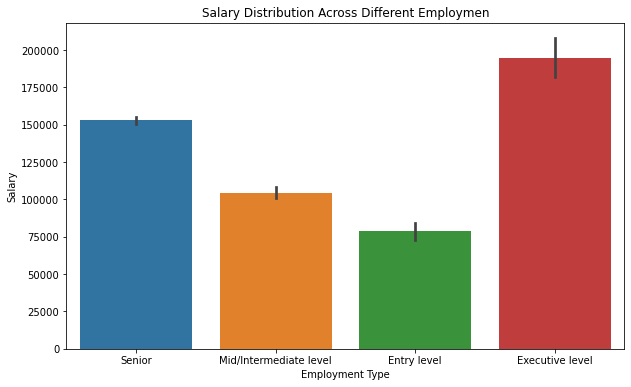

In [222]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))
sns.barplot(data=Data, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employmen')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

It can be seen from the graph that the salaries for the employees at executive level is the highest followed by senior and intermediate level. Thus, it can be concluded that as you go up the ladder in the organisation the salaries tends to increase.

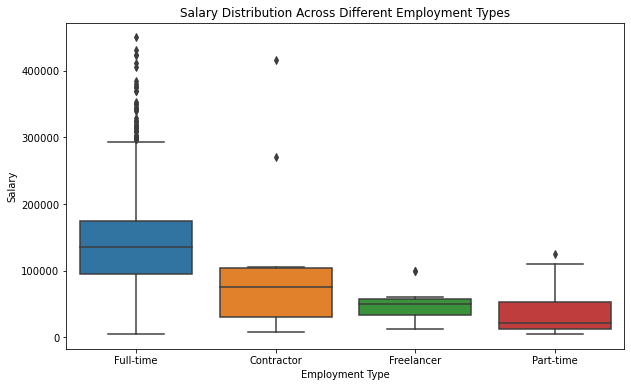

In [223]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

The salary distribution across the employment types is highest among people who work full time followed by Contractual work. There are multiple outliers in the plot but the salaries can be higher in different cases. Therefore, removal of these outliers can create a bias in data.

Text(0.5, 1.0, 'Correlation Heat Map - Spearman Coeff')

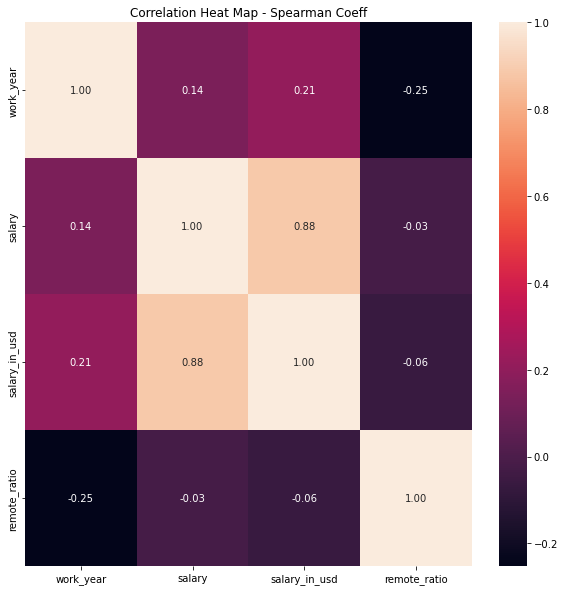

In [224]:
#plot a heatmap to filter out the features as input to logistic regression
plt.figure(figsize = (10, 10))
sns.heatmap(Data.corr('spearman'), annot = True, fmt = ".2F")
plt.title("Correlation Heat Map - Spearman Coeff")

There is a positive correlation between salary_in_usd and work_year. It could mean that there is an increase in salaries in data science roles every year.

In [225]:
# Create a copy of data
Model_data = Data.copy()


In [226]:
#Job title wise distribution of employees
Model_data["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [227]:
#Limiting the number of variables in job title feature
def map_job_title(job_title):
    if job_title in ["Data Engineer", "Data Scientist", "Data Analyst", "Machine Learning Engineer"]:
        return job_title
    else:
        return "Other"

Model_data["new_job_title"] = Model_data["job_title"].apply(map_job_title)

In [228]:
# new Job title wise distribution
Model_data["new_job_title"].value_counts()

Data Engineer                1040
Other                         974
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Name: new_job_title, dtype: int64

In [229]:
# company location wise distribution
Model_data["company_location"].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [230]:
Data["company_location"] = np.where(Data["company_location"] == "US", 1,0)
Model_data.rename(columns={"company_location" : "company_location_US"}, inplace=True)
Model_data["company_location_US"].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location_US, Length: 72, dtype: int64

In [231]:
# employee residence count
Model_data["employee_residence"].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [232]:
#Number of employees residing in US and other countries where 1 is US residents and 0 is other country residents
Model_data["employee_residence"] = np.where(Data["employee_residence"]=="US", 1,0)
Model_data.rename(columns={"employee_residence" : "employee_residence_US"}, inplace=True)
Model_data["employee_residence_US"].value_counts()

1    3004
0     751
Name: employee_residence_US, dtype: int64

In [233]:
# X Input for models
features = ["work_year", "experience_level", "employment_type", "employee_residence_US", "remote_ratio",
           "company_location_US", "company_size", "new_job_title"]
X = Model_data[features]
X.head()

,work_year,experience_level,employment_type,employee_residence_US,remote_ratio,company_location_US,company_size,new_job_title
0,2023,Senior,Full-time,0,100,ES,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,1,100,US,SMALL,Other
2,2023,Mid/Intermediate level,Contractor,1,100,US,SMALL,Other
3,2023,Senior,Full-time,0,100,CA,MEDIUM,Data Scientist
4,2023,Senior,Full-time,0,100,CA,MEDIUM,Data Scientist


In [234]:
# Y input for model
y = Model_data.salary_in_usd

In [235]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [236]:
# select categorical columns
categorical_cols = Model_data.select_dtypes(include=["object", "category"]).columns
categorical_cols = categorical_cols.drop(["salary_currency", "job_title"])
categorical_cols

Index(['experience_level', 'employment_type', 'company_location_US',
       'company_size', 'new_job_title'],
      dtype='object')

In [237]:
# select numerical columns
numerical_cols = Model_data.select_dtypes(include=["float", "int"]).columns
numerical_cols = numerical_cols.drop(["salary", "salary_in_usd"])
numerical_cols

Index(['work_year', 'employee_residence_US', 'remote_ratio'], dtype='object')

In [238]:
# preprocessing steps for numerical data
numerical_data = SimpleImputer(strategy="median")  

# prepoccesing steps for categorical data
categorical_data = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("hotencoder", OneHotEncoder(handle_unknown="ignore"))])

# combine both hte numberical and categorical data
input_value = ColumnTransformer(transformers=[
    ("num", numerical_data, numerical_cols),
    ("cat", categorical_data, categorical_cols)])


Multiple regression helps to determine a relationship between dependent variable("salary_in_usd") and independent variables("work_year", "experience_level", "employment_type", "employee_residence_US", "remote_ratio",
           "company_location_US", "company_size", "new_job_title")

In [239]:
#Used multiple regression 
from sklearn.linear_model import LinearRegression
 
# define model for multiple regression
lr_model = LinearRegression()

In [240]:
# build the pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", input_value), 
    ("lr", lr_model)    
])

# fit the model
lr_pipeline.fit(X_train, y_train)

# prediction of values of test data
lr_y_pred = lr_pipeline.predict(X_test)
# prediction of values of training data
lr_y_pred_train = lr_pipeline.predict(X_train)

#mean absolute error of training data
lr_mae_train = mean_absolute_error(y_train, lr_y_pred_train)

# mean absolute error of test data
lr_mae = mean_absolute_error(y_test, lr_y_pred)

# r2 score
lr_r2 = r2_score(y_test, lr_y_pred)

print("MAE Linear Regression of training data: ", lr_mae_train)
print("MAE Linear Regression: ", lr_mae)
print("r2 Linear Regression: ", lr_r2)

MAE Linear Regression of training data:  35861.15987339047
MAE Linear Regression:  37433.35112028607
r2 Linear Regression:  0.3932531564203602


# The r2 score tells the amount of variation of dependent variable that can be explained by independent variable. In our model, the r2 score value is 0.3932531564203602 which indicated that approximately 39 percent of variation can be explained in salaries can be explained by other input values.

# The Mean absolute error value gives the absolute difference between actual and predicted value. I have taken out the MAE of training and testing data to draw down the comparison. The MAE is slightly higher.

# We can conclude that there is lower accuracy of regression model. Hence the factors has limited influence on the salaries of people.

In [241]:
#GridSearchCV helps to  train the model multiple times on different parameters specified. 
#We can test our model with each parameter and find the best value to get accurate results.
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    "lr__normalize": [True, False],
    "lr__fit_intercept": [True, False]
}

#create Gridsearch object
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)

# Fit the new GridSearchCV object on the training data
lr_grid_search.fit(X_train, y_train)

# Print the best parameters and the validation set score
print("Best parameters: ", lr_grid_search.best_params_)
print("Crossvalidation score: ", lr_grid_search.best_score_)

Best parameters:  {'lr__fit_intercept': True, 'lr__normalize': False}
Crossvalidation score:  0.3932000864116648


In [242]:
# get the score for the test data
lr_valid_score = lr_grid_search.score(X_test,y_test)

# print score
print("Validation Score: ", lr_valid_score)

Validation Score:  0.3932531564203602


In [243]:
#convert the categorical into numerical value to feed into the model
one_hot_encoded = pd.get_dummies(Data, columns=['experience_level',"job_title", 'employment_type', 'employee_residence', "salary_currency",'company_location',"company_size"])
one_hot_encoded

,work_year,salary,salary_in_usd,remote_ratio,experience_level_Entry level,experience_level_Executive level,experience_level_Mid/Intermediate level,experience_level_Senior,job_title_3D Computer Vision Researcher,job_title_AI Developer,...,salary_currency_PLN,salary_currency_SGD,salary_currency_THB,salary_currency_TRY,salary_currency_USD,company_location_0,company_location_1,company_size_LARGE,company_size_MEDIUM,company_size_SMALL
0,2023,80000,85847,100,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2023,30000,30000,100,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2023,25500,25500,100,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2023,175000,175000,100,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
4,2023,120000,120000,100,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,412000,412000,100,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3751,2021,151000,151000,100,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3752,2020,105000,105000,100,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3753,2020,100000,100000,100,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


One hot encoded converts the categorical variables into numberical values that can be an input into ML models to improve prediction accuracy. 

In [245]:
# create X and y to divide the dataset into training and testing to convert string to float for input for KNN model


X = one_hot_encoded.drop("salary_in_usd", axis=1)
X.head()
y = one_hot_encoded['salary_in_usd'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

K Nearest Neighbor make use of closest distance to make predictions about the grouping

In [251]:
from sklearn.neighbors import KNeighborsRegressor

reg_knn = KNeighborsRegressor(n_neighbors=5)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [252]:
#check accuracy of our model on the test data
reg_knn.score(X_test, y_test)

0.9154274775435619

In [253]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

Once the model is fit, we can find the optimal parameter of K using GridSearchCV. We can see that the best value of K is 9.

In [256]:
from sklearn.metrics import r2_score

def mean_abs_error(y, preds):
    return np.mean(np.abs(y - preds))

def root_mean_squared_error(y, preds):
    return np.sqrt(np.mean(np.square(y - preds)))
#Checking the accuracy predictors 
reg_knn_preds = reg_knn.predict(X_test)
#test data mae
mae = mean_abs_error(y_test, reg_knn_preds)
#test data rmse
rmse = root_mean_squared_error(y_test, reg_knn_preds)
#test data r2 score 
r2score = r2_score(y_test, reg_knn_preds)
#train data 
reg_knn_preds_train = reg_knn.predict(X_train)
mae_train = mean_abs_error(y_train, reg_knn_preds_train)
rmse_train = root_mean_squared_error(y_train, reg_knn_preds_train)

print("the mean abs error of the model is {}".format(mae_train))
print("the root mean squared error of the model is {}".format(rmse_train))
print("the mean abs error of the model is {}".format(mae))
print("the root mean squared error of the model is {}".format(rmse))
print("the r2 score of the model is {}".format(r2score))


the mean abs error of the model is 2538.1623169107856
the root mean squared error of the model is 15495.91214751626
the mean abs error of the model is 3266.7323568575234
the root mean squared error of the model is 18272.23425066309
the r2 score of the model is 0.9154274775435619


The r2 score value is 0.9154274775435619 which indicated that approximately 91.5 percent of variation can be explained in salaries can be explained by other input values. The difference between train and test model rmse and mae is less which suggests it is a good model.
It can be concluded it is a good model for prediction and salaries can be predicted from the indepenedent variables
